Imports

In [1]:
import matplotlib.pyplot as plt
from PDE_FIND import *
import scipy.io as sio

Load data

In [2]:
data = sio.loadmat("/Users/edwardmcdugald/Research/convection_patterns/code/data/sh.mat")

Display sample of results (snapshot in time)

Text(0, 0.5, 'y')

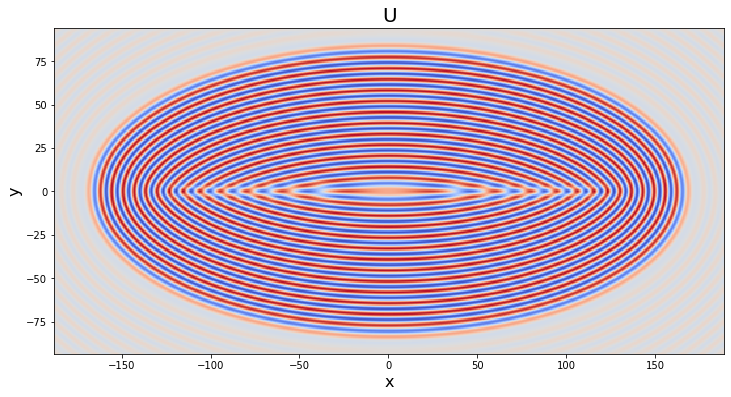

In [3]:
t = data['tt'].T[:,0]
x = data['xx'].T[0,:]
y = data['yy'].T[0,:]
U = data['uu']

nx = len(x)
ny = len(y)
steps = len(t)
dx = x[1]-x[0]
dy = y[1]-y[0]
dt = t[1]-t[0]

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
xx, yy = np.meshgrid(x,y)
ax1.pcolor(xx,yy,U[:,:,10].T,cmap='coolwarm')
ax1.set_title('U', fontsize = 20)
ax1.set_xlabel('x', fontsize = 16)
ax1.set_ylabel('y', fontsize = 16)

Dataset is large- so we randomly 150,000 data points

In [4]:

# Sample a collection of data points.  See figure 1 panel 2a.
np.random.seed(0) # so that numbers in paper are reproducible

num_xy = 5000 # needs to be very high to work with noise
num_t = 30
num_points = num_xy * num_t
boundary = 5
points = {}
count = 0

for p in range(num_xy):
    x = np.random.choice(np.arange(boundary,nx-boundary),1)[0]
    y = np.random.choice(np.arange(boundary,ny-boundary),1)[0]
    for t in range(num_t):
        points[count] = [x,y,6*t+10]
        count = count + 1
print("done")

done


Consruct $\Theta(U)$ and $U_t$

In [5]:
# Take up to second order derivatives.
u = np.zeros((num_points,1))
ut = np.zeros((num_points,1))
ux = np.zeros((num_points,1))
uy = np.zeros((num_points,1))
uxx = np.zeros((num_points,1))
uxy = np.zeros((num_points,1))
uyy = np.zeros((num_points,1))

N = 2*boundary-1  # number of points to use in fitting
Nt = N
deg = 8 # degree of polynomial to use

for p in points.keys():

    [x,y,t] = points[p]

    # value of function
    u[p] = U[x,y,t]

    # time derivatives
    ut[p] = PolyDiffPoint(U[x,y,t-(Nt-1)//2:t+(Nt+1)//2], np.arange(Nt)*dt, deg, 1)[0]

    # spatial derivatives
    ux_diff = PolyDiffPoint(U[x-(N-1)//2:x+(N+1)//2,y,t], np.arange(N)*dx, deg, 4)
    uy_diff = PolyDiffPoint(U[x,y-(N-1)//2:y+(N+1)//2,t], np.arange(N)*dy, deg, 4)
    ux_diff_yp = PolyDiffPoint(U[x-(N-1)//2:x+(N+1)//2,y+1,t], np.arange(N)*dx, deg, 4)
    ux_diff_ym = PolyDiffPoint(U[x-(N-1)//2:x+(N+1)//2,y-1,t], np.arange(N)*dx, deg, 4)


    ux[p] = ux_diff[0]
    uy[p] = uy_diff[0]
    uxx[p] = ux_diff[1]
    uyy[p] = uy_diff[1]
    

In [7]:
# Form Theta using up to quadratic polynomials in all variables.
X_data = u
X_ders = np.hstack([np.ones((num_points,1)), ux, uy, uxx, uyy])
X_ders_descr = ['','u_{x}', 'u_{y}','u_{xx}','u_{yy}']
X, description = build_Theta(X_data, X_ders, X_ders_descr, 3, data_description = ['u'])
['1'] + description[1:]

['1',
 'u_{x}',
 'u_{y}',
 'u_{xx}',
 'u_{xy}',
 'u_{yy}',
 'u',
 'u^2',
 'u^3',
 'uu_{x}',
 'u^2u_{x}',
 'u^3u_{x}',
 'uu_{y}',
 'u^2u_{y}',
 'u^3u_{y}',
 'uu_{xx}',
 'u^2u_{xx}',
 'u^3u_{xx}',
 'uu_{xy}',
 'u^2u_{xy}',
 'u^3u_{xy}',
 'uu_{yy}',
 'u^2u_{yy}',
 'u^3u_{yy}']